ABM - Modelo de Nagel-Schreckberg - Gestão de Trafego

O modelo de Nagel-Schreckberg é um modelo teórico para simulação de trefego em via livre. É em essencia uma automação celular que reproduz congestionamentos. No modelo de Nagel, a pista é dividida em células, cada celula é um ponto vazio ou contem um carro. Nenhum celula tem mais de um carro a cada momento. Cada carro tem uma velocidade inteira, entre 0 e 5. Em cada rodada do modelo, atualizações são feitas:

1. Aceleração: Todos os carros que não estão na velocidade máxima têm a sua
velocidade aumentada em uma unidade. Por exemplo, se a velocidade for 4, é aumentada para 5.

2. Frenagem: Todos os carros são verificados para ver se a distância entre eles e o carro da frente (em unidades de células) é menor do que a sua velocidade atual (que tem unidades de células por passo de tempo). Se a distância for inferior à velocidade, a velocidade é reduzida ao número de células vazias à frente do carro - para evitar uma colisão. Por exemplo, se a velocidade de um carro é agora 5, mas há apenas 3 células livres à sua frente, com a quarta célula ocupada por outro carro, a velocidade do carro é reduzida para 3.


3. Randomização: A velocidade de todos os carros que têm uma velocidade de pelo menos 1, é agora reduzida numa unidade com uma probabilidade de p. Por exemplo, se p = 0,5, então se a velocidade for 4, é reduzida para 3 50% das vezes.


4. Movimento do carro: Finalmente, todos os carros são movidos para a frente o número de células igual à sua velocidade. Por exemplo, se a velocidade for 3, o carro avança 3 células.




In [ ]:
!pip install mesa --quiet

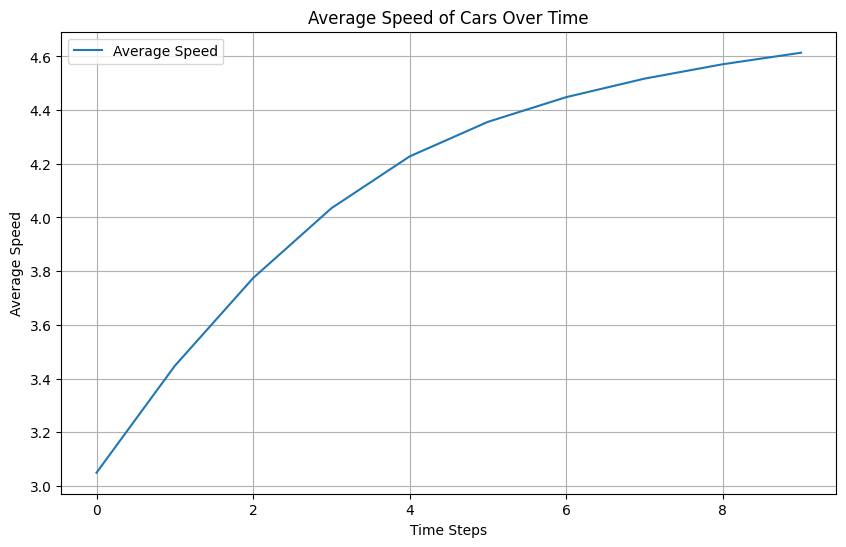

In [ ]:

import random
import matplotlib.pyplot as plt
import mesa as abm
from mesa.datacollection import DataCollector

class Car(abm.Agent):
    def __init__(self, id, model):
        super().__init__(id, model)
        colors = ['white', 'gray', 'black', 'silver', 'blue', 'red']
        self.id = id
        self.model = model
        self.color = random.sample(colors, 1)[0]
        self.speed = random.randint(1, 5)
        self.max_speed = 5
        self.proximity_to_semaphore = random.randint(1, 10)  # Define a proximidade ao semáforo

    def move(self):
        if self.model.semaphore_color == "green":
            possible_moves = self.model.lattice.get_neighborhood(
                self.pos, moore=True, include_center=False
            )
            new_position = random.choice(possible_moves)
            self.model.lattice.move_agent(self, new_position)

        if self.speed < self.max_speed:
            # Verifique a proximidade ao semáforo e a cor do semáforo
            if self.proximity_to_semaphore <= 2 and self.model.semaphore_color == "red":
                # Se o carro estiver perto do semáforo e o semáforo estiver vermelho, reduza a velocidade
                self.speed = max(1, self.speed - 1)
            else:
                self.speed += 1

        if random() < 0.15 and self.speed >= 1: #parte 3
            self.speed -= 1 #paulo

    def step(self):
        self.move()

class TrafficModel(abm.Model):
    def __init__(self, width, height, N):
        self.N = N
        self.lattice = abm.space.MultiGrid(width, height, True)
        self.schedule = abm.time.RandomActivation(self)
        self.semaphore_color = "green"
        self.semaphore_duration = 10
        self.current_semaphore_time = 0

        for i in range(self.N):
            car = Car(i, self)
            x = random.randrange(self.lattice.width)
            y = random.randrange(self.lattice.height)
            self.lattice.place_agent(car, (x, y))
            self.schedule.add(car)

        self.datacollector = DataCollector(
            agent_reporters={"Speed": "speed"}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

        self.current_semaphore_time += 1
        if self.current_semaphore_time >= self.semaphore_duration:
            if self.semaphore_color == "green":
                self.semaphore_color = "red"
            else:
                self.semaphore_color = "green"
            self.current_semaphore_time = 0




N = 1000              # Number of agents
width = 10            # Grid width
height = 10           # Grid height
T = 10               # Number of periods

model = TrafficModel(width, height, N)

# Lists to store data for plotting
time_steps = []
average_speeds = []


# Run the simulation and collect data
for t in range(T):
    model.step()
    data = model.datacollector.get_agent_vars_dataframe()
    average_speed = data['Speed'].mean()
    time_steps.append(t)
    average_speeds.append(average_speed)

# Plot the average speed over time
plt.figure(figsize=(10, 6))
plt.plot(time_steps, average_speeds, label='Average Speed')
plt.xlabel('Time Steps')
plt.ylabel('Average Speed')
plt.title('Average Speed of Cars Over Time')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
N = 100
width = 10
height = 10

In [ ]:
model = TrafficModel(width,height,N)
model.step( )

In [ ]:
print_agent = True        # enable printing
model = TrafficModel(width,height,N)
for t in range( 10 ) :
    print( "Time=%d" % t )
    model.step( )

Time=0
Time=1
Time=2
Time=3
Time=4
Time=5
Time=6
Time=7
Time=8
Time=9
